In [127]:
import pyarrow.parquet as pq
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [128]:
skim = pd.read_parquet("Skim_neweta.parquet")

In [129]:
print(df)

        weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0     2.095178 -2.393572 -2.922358   2.951623    0.534528 -2.449574  0.575581   
1     2.095178  1.871283  1.047394   2.573060    0.773788  0.890115 -2.034852   
2     2.095178  2.091786 -1.589172   3.478898    0.846155  1.033298  2.798018   
3     2.095178  0.276418  0.034514   0.957748    0.922289  1.291733  2.735958   
4     2.095178 -0.222354  0.316651   2.682673    2.617695  0.326127  0.229977   
...        ...       ...       ...        ...         ...       ...       ...   
3691  0.009153  1.767487 -2.685603   2.533158    0.840620  2.022784  1.191282   
3692  0.009153 -0.761641 -1.350025   1.366371    1.047554 -2.588544 -0.412600   
3693  0.009153  0.137637  2.189009   0.688119    0.681652  1.682014  0.102387   
3694  0.009153  0.118838 -2.689873   0.456992    0.453784 -2.057512  0.021551   
3695  0.009153  1.119464  2.110899   1.128419    0.665800  1.023254 -1.432882   

      E_mGG_ph2  pT_mGG_ph2

In [130]:
df["label"] = 0
df = df[df['weight']>0]

In [131]:
print(df)

        weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0     2.095178 -2.393572 -2.922358   2.951623    0.534528 -2.449574  0.575581   
1     2.095178  1.871283  1.047394   2.573060    0.773788  0.890115 -2.034852   
2     2.095178  2.091786 -1.589172   3.478898    0.846155  1.033298  2.798018   
3     2.095178  0.276418  0.034514   0.957748    0.922289  1.291733  2.735958   
4     2.095178 -0.222354  0.316651   2.682673    2.617695  0.326127  0.229977   
...        ...       ...       ...        ...         ...       ...       ...   
3691  0.009153  1.767487 -2.685603   2.533158    0.840620  2.022784  1.191282   
3692  0.009153 -0.761641 -1.350025   1.366371    1.047554 -2.588544 -0.412600   
3693  0.009153  0.137637  2.189009   0.688119    0.681652  1.682014  0.102387   
3694  0.009153  0.118838 -2.689873   0.456992    0.453784 -2.057512  0.021551   
3695  0.009153  1.119464  2.110899   1.128419    0.665800  1.023254 -1.432882   

      E_mGG_ph2  pT_mGG_ph2

In [132]:
df.loc[df.process.str.contains("HHH"), ['label']] = 1

In [133]:
batch_size = 128


def checkBatches(df):
    N_checks = 1000
    sum_sig = 0.
    N_sig = 0
    sum_back = 0.
    N_back = 0
    for i in range(N_checks):
        rnd_df = df.sample(batch_size)
        sum_sig  += rnd_df[rnd_df['label']==1]['weight'].sum()
        sum_back += rnd_df[rnd_df['label']==0]['weight'].sum()
        N_sig    += rnd_df[rnd_df['label']==1].shape[0]
        N_back   += rnd_df[rnd_df['label']==0].shape[0]
    sum_sig  /= N_checks
    sum_back /= N_checks
    N_sig    /= N_checks
    N_back   /= N_checks

    print (f'On average, per batch the total learning weight is\n\t... signal     : {sum_sig:12.6f} [{N_sig} events] \n\t... background : {sum_back:12.6f} [{N_back} events]')



In [134]:
checkBatches(df)

On average, per batch the total learning weight is
	... signal     :    63.627563 [30.349 events] 
	... background :    72.259239 [97.651 events]


In [135]:
print(df)

        weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0     2.095178 -2.393572 -2.922358   2.951623    0.534528 -2.449574  0.575581   
1     2.095178  1.871283  1.047394   2.573060    0.773788  0.890115 -2.034852   
2     2.095178  2.091786 -1.589172   3.478898    0.846155  1.033298  2.798018   
3     2.095178  0.276418  0.034514   0.957748    0.922289  1.291733  2.735958   
4     2.095178 -0.222354  0.316651   2.682673    2.617695  0.326127  0.229977   
...        ...       ...       ...        ...         ...       ...       ...   
3691  0.009153  1.767487 -2.685603   2.533158    0.840620  2.022784  1.191282   
3692  0.009153 -0.761641 -1.350025   1.366371    1.047554 -2.588544 -0.412600   
3693  0.009153  0.137637  2.189009   0.688119    0.681652  1.682014  0.102387   
3694  0.009153  0.118838 -2.689873   0.456992    0.453784 -2.057512  0.021551   
3695  0.009153  1.119464  2.110899   1.128419    0.665800  1.023254 -1.432882   

      E_mGG_ph2  pT_mGG_ph2

In [136]:
print (f"Sum of learning weight for signal     = {df[df['label']==1]['weight'].sum():15.5f}")
print (f"Sum of learning weight for background = {df[df['label']==0]['weight'].sum():15.5f}")
df.loc[df['label']==1,'weight'] *= df.shape[0]/2 / df[df['label']==1]['weight'].sum() 
df.loc[df['label']==0,'weight'] *= df.shape[0]/2 / df[df['label']==0]['weight'].sum()
# We divide by their sum, and multiply by the number of events
#   First part is so that the sum of weights of the signal is now == to the background ones
#   The second part is because if the weights are super small, the loss will be small
#       In practice the magnitude does not matter, only relative difference, but it is easier
#       to check the learning when the loss variations are not far in the decimals
#       -> like that the average unit weight is 1
print ("After equalization")
print (f"Sum of learning weight for signal     = {df[df['label']==1]['weight'].sum():15.5f}")
print (f"Sum of learning weight for background = {df[df['label']==0]['weight'].sum():15.5f}")

print (f'Average learning weight = {df["weight"].mean()}')

print ('\nNow let us try again with batches')

Sum of learning weight for signal     =    133674.48438
Sum of learning weight for background =    133674.51562
After equalization
Sum of learning weight for signal     =    133674.53125
Sum of learning weight for background =    133674.48438
Average learning weight = 0.9999998807907104

Now let us try again with batches


In [137]:
checkBatches(df)

On average, per batch the total learning weight is
	... signal     :    63.572096 [30.316 events] 
	... background :    61.939237 [97.684 events]


In [138]:
input_vars=["Eta_ph1","Phi_ph1","E_mGG_ph1","pT_mGG_ph1","Eta_ph2","Phi_ph2","E_mGG_ph2","pT_mGG_ph2","Electron_E","Electron_pT","Electron_Eta","Electron_Phi","Muon_E","Muon_pT","Muon_Eta","Muon_Phi","nJets","E_jet1","pT_jet1","Eta_jet1","Phi_jet1","E_jet2","pT_jet2","Eta_jet2","Phi_jet2","InvM_jet","InvM_jet2", "met"]

In [139]:
print(df[input_vars])

       Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0    -2.393572 -2.922358   2.951623    0.534528 -2.449574  0.575581   
1     1.871283  1.047394   2.573060    0.773788  0.890115 -2.034852   
2     2.091786 -1.589172   3.478898    0.846155  1.033298  2.798018   
3     0.276418  0.034514   0.957748    0.922289  1.291733  2.735958   
4    -0.222354  0.316651   2.682673    2.617695  0.326127  0.229977   
...        ...       ...        ...         ...       ...       ...   
3691  1.767487 -2.685603   2.533158    0.840620  2.022784  1.191282   
3692 -0.761641 -1.350025   1.366371    1.047554 -2.588544 -0.412600   
3693  0.137637  2.189009   0.688119    0.681652  1.682014  0.102387   
3694  0.118838 -2.689873   0.456992    0.453784 -2.057512  0.021551   
3695  1.119464  2.110899   1.128419    0.665800  1.023254 -1.432882   

      E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...     pT_jet1  \
0      2.815203    0.482479   32.269810    30.670956  ...   75.722549   
1

In [140]:
df_clean = df[input_vars].copy()
df_clean["label"] = df.loc[:,"label"]
df_clean.to_csv("dataframe_HHWWgg.csv")


In [141]:
X_train, X_test, y_train, y_test,w_train, w_test = train_test_split(df[input_vars], df.label, df.weight, 
                                                    test_size=0.33, random_state=42)

In [142]:
print(X_train)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
35231  -1.945764 -3.062029   2.268816    0.635358 -0.550223 -2.298545   
8868   -1.820626 -0.043045   2.502725    0.789796 -2.617009 -2.681274   
71095   0.099085 -0.838356   0.544916    0.542252  0.862605  2.181485   
114269  1.282274 -2.663917   3.101353    1.597716  0.192350 -2.408060   
36454   1.539533 -1.002441   1.515589    0.621539  1.482318  1.691988   
...          ...       ...        ...         ...       ...       ...   
81876   0.373729 -2.581681   0.944210    0.881901  0.192384 -0.985424   
46     -2.201052 -2.005043   2.970534    0.649638 -1.052876  1.749613   
99997  -1.264996 -1.493569   0.969339    0.506802  0.020675  2.340647   
122596  0.644087 -2.541043   1.332074    1.096632 -0.388746  2.307051   
85023   1.311740  2.135893   2.354585    1.182620  0.749861 -0.459073   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...     pT_jet1  \
35231    0.640226    0.554198    0.000000     0.

In [143]:
print(X_test)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
3329    1.087376  0.904130   0.406792    0.246274 -1.648648 -3.020724   
2789    0.358049 -0.526940   0.437181    0.410581 -1.190133  2.006132   
15599  -1.195990 -2.027550   1.659136    0.919384 -1.642366  2.936179   
64363   1.061911 -2.731441   1.322440    0.816904  0.518941 -1.094325   
4149    1.903018 -1.843503   7.791508    2.273160  2.293625 -0.882963   
...          ...       ...        ...         ...       ...       ...   
2479   -0.581940  2.039370   0.636352    0.541964  0.964338 -2.795501   
126114 -1.491346  0.421756   3.139447    1.345052 -0.678817 -1.530567   
21718   1.412178  2.301200   1.858807    0.854919  0.758501  0.108824   
102035  0.152458 -2.928749   1.387487    1.371517 -0.176697  1.881357   
139654  0.053975  1.505935   0.673873    0.672893  0.499380 -1.281240   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...     pT_jet1  \
3329     0.647501    0.240160    0.000000     0.

In [144]:
inputs = keras.Input(shape=(len(input_vars),), name="particles")
x = layers.Dense(128, activation="relu", name="dense_1")(inputs)
x = layers.Dense(128, activation="relu", name="dense_2")(x)
x = layers.Dense(128, activation="relu", name="dense_3")(x)
x = layers.Dense(128, activation="relu", name="dense_4")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [145]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [146]:
X_val = X_train[-3000:]
y_val = y_train[-3000:]
w_val = w_train[-3000:]
X_train = X_train[:-3000]
y_train = y_train[:-3000]
w_train = w_train[:-3000]

In [147]:
print(X_train)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
35231  -1.945764 -3.062029   2.268816    0.635358 -0.550223 -2.298545   
8868   -1.820626 -0.043045   2.502725    0.789796 -2.617009 -2.681274   
71095   0.099085 -0.838356   0.544916    0.542252  0.862605  2.181485   
114269  1.282274 -2.663917   3.101353    1.597716  0.192350 -2.408060   
36454   1.539533 -1.002441   1.515589    0.621539  1.482318  1.691988   
...          ...       ...        ...         ...       ...       ...   
226     1.235625 -2.769479   0.545267    0.292276 -1.892016 -1.075950   
7165    0.263754  3.140718   0.507521    0.490366 -0.940107 -0.006229   
52402   0.883472  2.625479   1.435792    1.013752 -0.423323 -2.340479   
155590  0.331962 -0.270296   0.661482    0.626637 -0.756738 -2.802417   
21614  -1.913784 -1.134185   2.737480    0.790470 -2.256445  1.215554   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...     pT_jet1  \
35231    0.640226    0.554198    0.000000     0.

In [148]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=100,
    sample_weight=w_train,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val,w_val),
)




Epoch 1/100
1376/1376 [==============================] - 3s 2ms/step - loss: 1.2143 - binary_accuracy: 0.3733 - val_loss: 1.2229 - val_binary_accuracy: 0.6527
Epoch 2/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.8125 - binary_accuracy: 0.3756 - val_loss: 0.9958 - val_binary_accuracy: 0.3970
Epoch 3/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5942 - binary_accuracy: 0.3781 - val_loss: 0.5623 - val_binary_accuracy: 0.3013
Epoch 4/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5685 - binary_accuracy: 0.3829 - val_loss: 0.6821 - val_binary_accuracy: 0.3447
Epoch 5/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5985 - binary_accuracy: 0.3720 - val_loss: 0.6531 - val_binary_accuracy: 0.4150
Epoch 6/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5523 - binary_accuracy: 0.3912 - val_loss: 0.6883 - val_binary_accuracy: 0.3147
Epoch 7/100
1376/1376 [=======================

1376/1376 [==============================] - 3s 2ms/step - loss: 0.5848 - binary_accuracy: 0.4629 - val_loss: 0.5681 - val_binary_accuracy: 0.4990
Epoch 53/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5404 - binary_accuracy: 0.4766 - val_loss: 0.6833 - val_binary_accuracy: 0.4163
Epoch 54/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5662 - binary_accuracy: 0.4718 - val_loss: 0.6689 - val_binary_accuracy: 0.4267
Epoch 55/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5305 - binary_accuracy: 0.4640 - val_loss: 0.5994 - val_binary_accuracy: 0.3783
Epoch 56/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5254 - binary_accuracy: 0.4543 - val_loss: 0.4576 - val_binary_accuracy: 0.4547
Epoch 57/100
1376/1376 [==============================] - 3s 2ms/step - loss: 0.5566 - binary_accuracy: 0.4589 - val_loss: 0.6447 - val_binary_accuracy: 0.7273
Epoch 58/100
1376/1376 [=============================

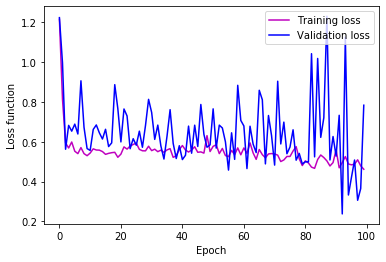

In [149]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
plt.savefig('training_validation.pdf')
plt.show()

[[7.3173642e-04]
 [1.0517445e-01]
 [9.9940556e-01]
 ...
 [1.0517445e-01]
 [9.9361408e-01]
 [9.9468225e-01]]
[nan nan nan ... nan nan nan]
[0.         0.00512065 0.00545485 ... 0.9930296  0.99656254 1.        ]
[2.00000000e+00 1.00000000e+00 9.99999881e-01 ... 1.05778664e-01
 1.05174452e-01 4.80808867e-14]


/home/donertas/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/donertas/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


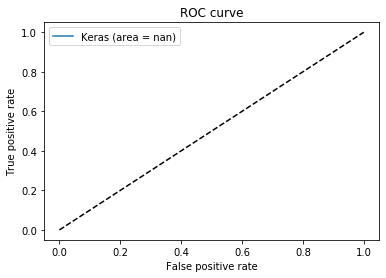

In [150]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
idx = y_test > 0
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test[idx], prediction[idx],sample_weight=w_test[idx])

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)
print(fpr_keras)
print(tpr_keras)
print(thresholds_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig("ROC_curve.pdf")
plt.show()

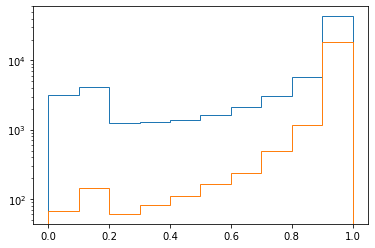

In [151]:
plt.hist(prediction[y_test==0],histtype=("step"));
plt.hist(prediction[y_test==1],histtype=("step"));
plt.yscale('log') 
plt.savefig("prediction.pdf", dpi = 300)

In [47]:
# evaluate the model
scores = model.evaluate(X_test, y_test, w_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3460/3460 - 2s - loss: 0.3782 - binary_accuracy: 0.8355 - 2s/epoch - 459us/step
binary_accuracy: 83.55%


In [48]:
# save model and architecture to single file
model.save("model_dnn_neweta")
print("Saved model to disk")

INFO:tensorflow:Assets written to: model_dnn_neweta/assets
Saved model to disk
